Import all the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

filename="C:\ML\Game_rating.csv"
df=pd.read_csv(filename)

Overview of the dataset with the first five features

In [2]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Concise description which tells us the number of non-null entities in each column and the datatype of the columns. We find that there are no null values in the dataset and it consists of two rows with object datatype and the rest of the columns are integers.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

Get the standard statistics of each column, including the count, mean, standard deviation and so on. We find that most of the numerical columns are binary, having only 0s and 1s. This suggests they are boolean.

In [4]:
df.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,...,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.475462,0.050132,0.010026,0.227968,0.126121,0.019525,0.054354,0.034828,0.220580,0.118206,...,0.013193,0.034301,0.057520,0.067018,0.118206,0.035884,0.117678,0.015831,0.015831,0.063852
std,0.499529,0.218275,0.099655,0.419633,0.332074,0.138398,0.226774,0.183394,0.414748,0.322937,...,0.114129,0.182049,0.232895,0.250120,0.322937,0.186050,0.322312,0.124855,0.124855,0.244554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We check for null values in each column. There are no null values.

In [5]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

We find count of each unique value in target column. We find the 'T' ratings are the most common, followed by E, ET and M.
T - Teen, E - Everyone, ET - Early Ten+, M - Mature. These tell what ages the games are suitable for.

In [6]:
df.iloc[:, -1].value_counts()

esrb_rating
T     689
E     416
ET    403
M     387
Name: count, dtype: int64

Plotting the data we acquired previously in a countplot graph. (Monovariate analysis)

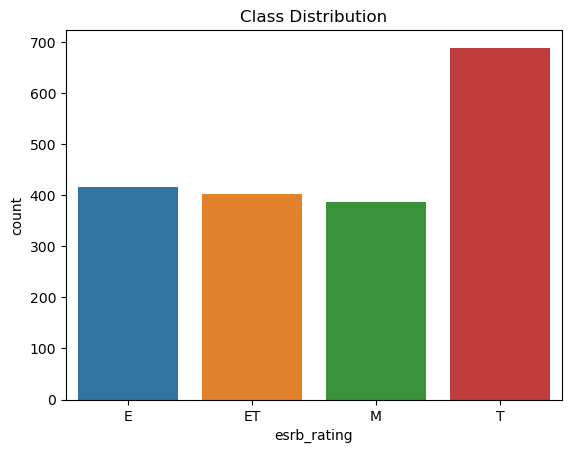

In [7]:
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution")
plt.show()

Bivariate analysis, between violence and esrb_rating. Since violence is a binary boolean data, the correlation between them is ambiguous.

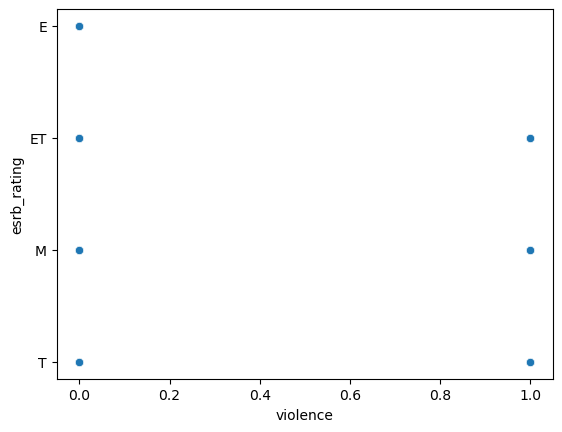

In [8]:
sns.scatterplot(data=df, x="violence", y="esrb_rating")
plt.show()

Multivariate analysis
This code applies PCA (Principal Component Analysis) to reduce the dimensionality of the dataset to two components. It scales the data, performs PCA transformation, and visualizes the results in a 2D scatter plot, colored by esrb_rating, to identify patterns and clusters in the descriptors.

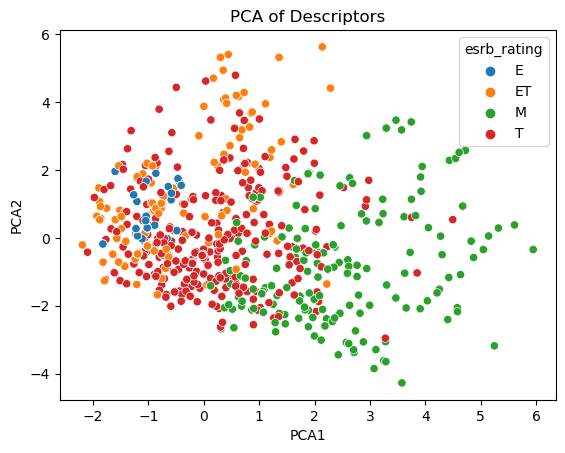

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 1:-1]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'], df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='esrb_rating')
plt.title('PCA of Descriptors')
plt.show()

We can see from the plot that eventhough there is some clustering, there is also significant overlap between the clusters. E, ET and T have the most overlapping clusters, this indicates that the deciding factors for these ratings are similar to each other with some differences.

We drop the title column as it is an object column and cannot be used in the model. We also cannot convert it into numerical values as it has only unique values, thus encoding will create too many unnecessary columns. We also drop PCA1 and PCA2 from the previous step as it will conflic with the target and feature split.

We split the data into target data (y) and feature data (x) and also into train and test sets. We also encode the target data(we check if its datatype is object first) using label encoding as we only have 4 unique values. By default label encoder assigns numerical values in alphabetical order, so E, ET, M, T as 0, 1, 2, 3.

In [10]:
df=df.drop(['title'],axis=1)
df=df.drop(['PCA1'],axis=1)
df=df.drop(['PCA2'],axis=1)

X = df.drop('esrb_rating', axis=1)
y = df['esrb_rating']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(label_encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


['E' 'ET' 'M' 'T']


We use the StandardScalar to scale the data into a similar range. This makes sure the model does not get biased towards the features with higher values. Since the data is mostly binary, this step doesn't change the data.

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Iniitializing the models
Gini and entropy are both criteria used to measure the "impurity" or "homogeneity" of a dataset when building decision trees. Gini measures the frequency of incorrect classifications, while entropy quantifies the disorder or uncertainty in the data, with lower values indicating a more certain classification.

In [12]:
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)

Fitting the models

In [13]:
gini_tree.fit(X_train, y_train)
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Make Predictions

In [14]:
y_pred_gini = gini_tree.predict(X_test)
y_pred_entropy = entropy_tree.predict(X_test)

Evaluate Gini Decision Tree

In [15]:
print("--- Gini Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Precision:", precision_score(y_test, y_pred_gini, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_gini, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_gini, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gini))

--- Gini Decision Tree ---
Accuracy: 0.827768014059754
Precision: 0.8358311011257649
Recall: 0.827768014059754
F1 Score: 0.8292632756225289
Confusion Matrix:
 [[123   0   0   2]
 [  5  96   0  20]
 [  0   6  97  13]
 [  3  43   6 155]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       125
           1       0.66      0.79      0.72       121
           2       0.94      0.84      0.89       116
           3       0.82      0.75      0.78       207

    accuracy                           0.83       569
   macro avg       0.84      0.84      0.84       569
weighted avg       0.84      0.83      0.83       569



This Gini decision tree classifier has an accuracy of 82.8%, with a balanced precision and recall across the classes. The confusion matrix shows the classifier performs well for most classes, especially class 0 (high precision and recall), but struggles with class 1 (lower precision and recall). The F1 score of 0.83 indicates an overall good performance, though there's room for improvement in some categories, particularly class 1.

In [16]:
print("--- Entropy Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Precision:", precision_score(y_test, y_pred_entropy, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_entropy, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_entropy, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_entropy))

--- Entropy Decision Tree ---
Accuracy: 0.8312829525483304
Precision: 0.8348247399261879
Recall: 0.8312829525483304
F1 Score: 0.8314709930361953
Confusion Matrix:
 [[123   0   0   2]
 [  5  96   0  20]
 [  0   1 101  14]
 [  3  42   9 153]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       125
           1       0.69      0.79      0.74       121
           2       0.92      0.87      0.89       116
           3       0.81      0.74      0.77       207

    accuracy                           0.83       569
   macro avg       0.84      0.85      0.84       569
weighted avg       0.83      0.83      0.83       569



This Entropy decision tree classifier has a slightly higher accuracy (83.1%) compared to the Gini model. The precision, recall, and F1 score are all similar to the Gini model, with class 0 again performing very well. Class 1 still shows lower precision and recall, though slightly better than the Gini model. The classifier performs similarly across all classes, with a balanced overall performance (F1 score of 0.83), but there is still room for improvement, particularly for class 1.

Comparative Analysis

In [17]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("Comparative Analysis:")
print(f"Gini Index Accuracy: {accuracy_gini}")
print(f"Entropy Accuracy: {accuracy_entropy}")

Comparative Analysis:
Gini Index Accuracy: 0.827768014059754
Entropy Accuracy: 0.8312829525483304


Entropy has a slightly better accuracy than Gini Index. This suggests that the entropy-based splitting criterion is better at minimizing the classification errors in this particular dataset.

Visualize Decision Tree (Gini)

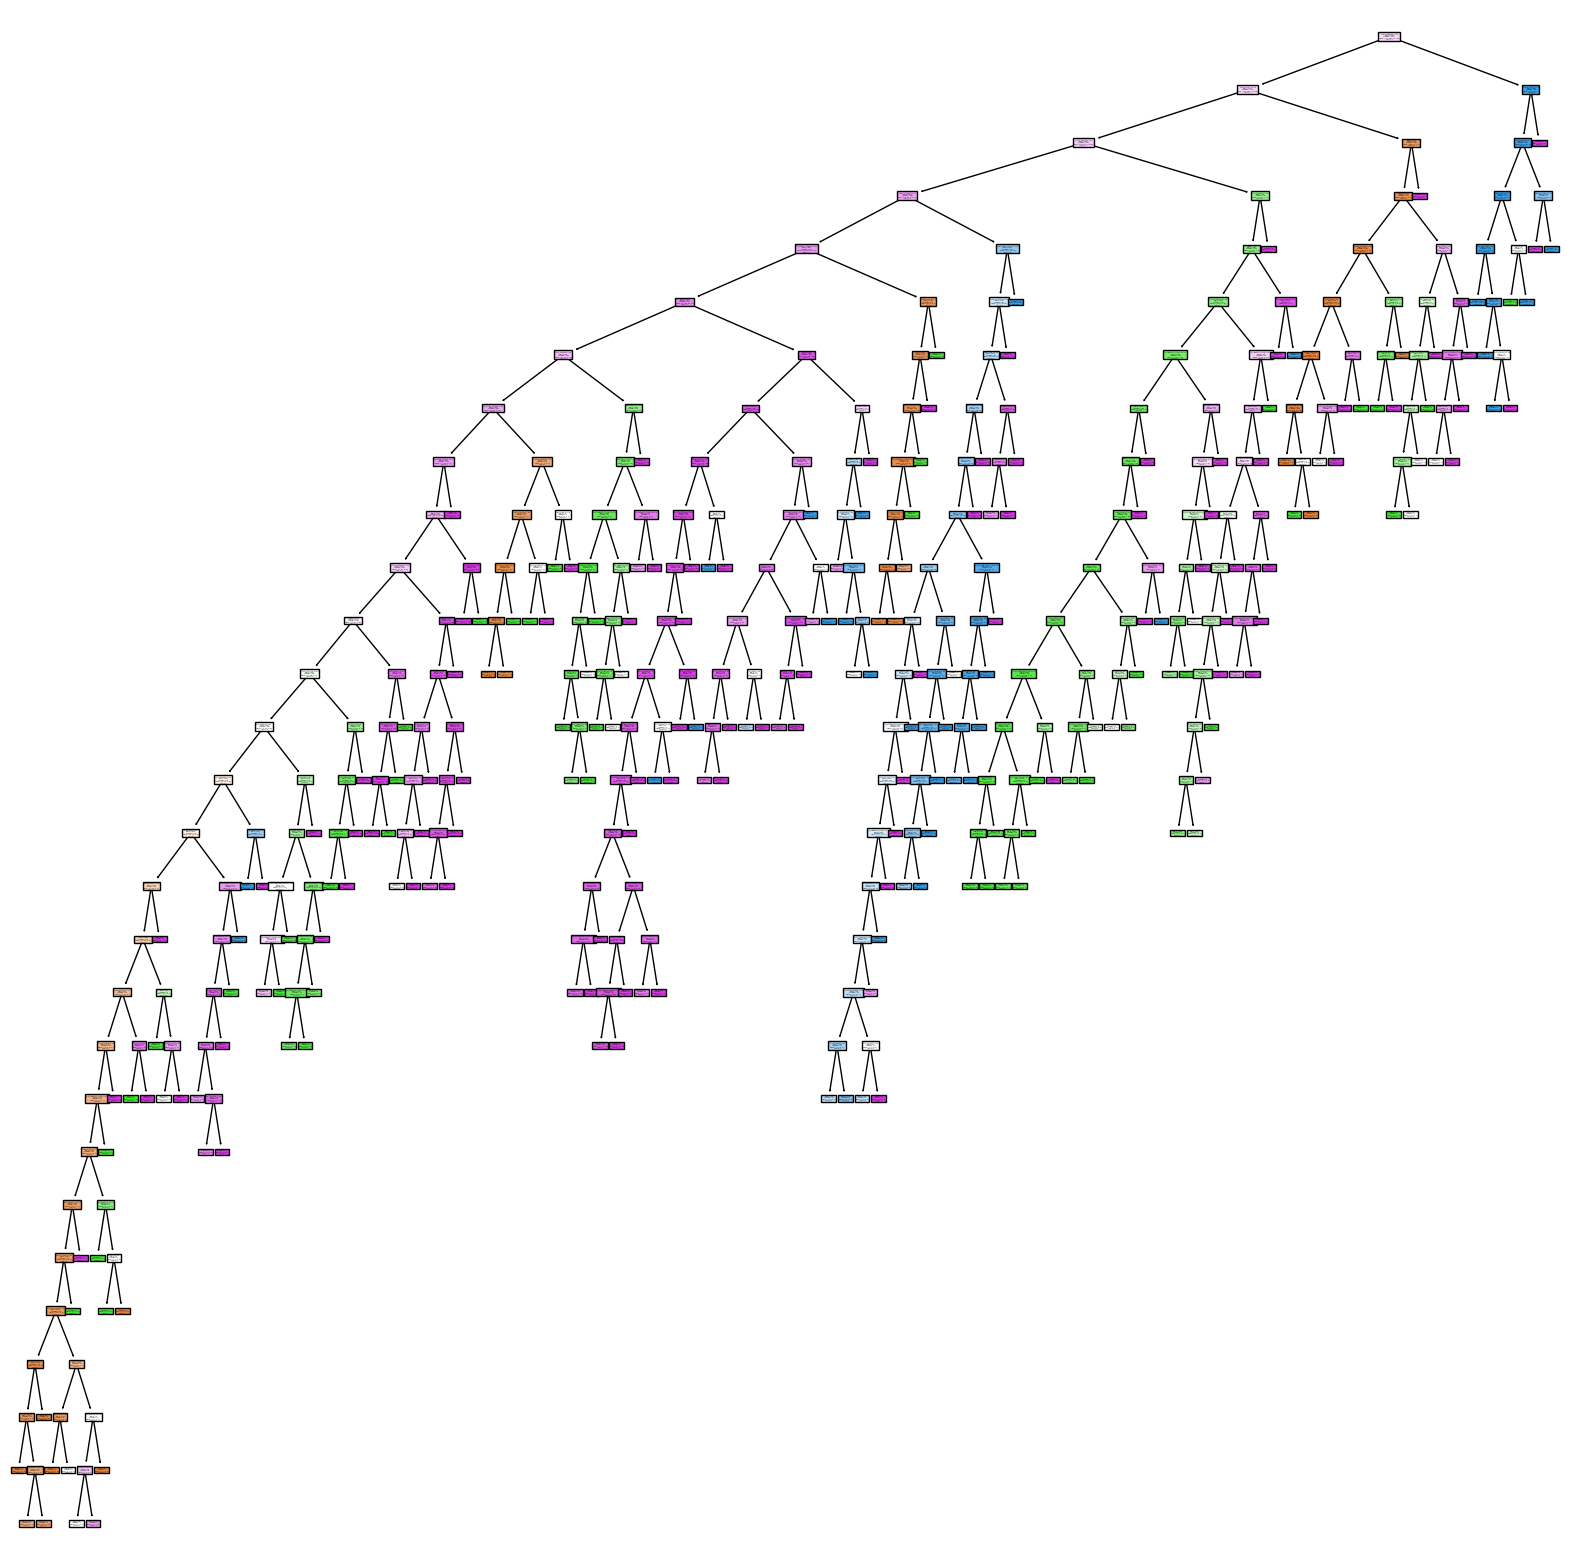

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 20))
features = list(X.columns)
classes = list(label_encoder.classes_)
tree.plot_tree(gini_tree, feature_names=features, class_names=classes, filled=True)

plt.show()

Confusion Matrix (Gini)

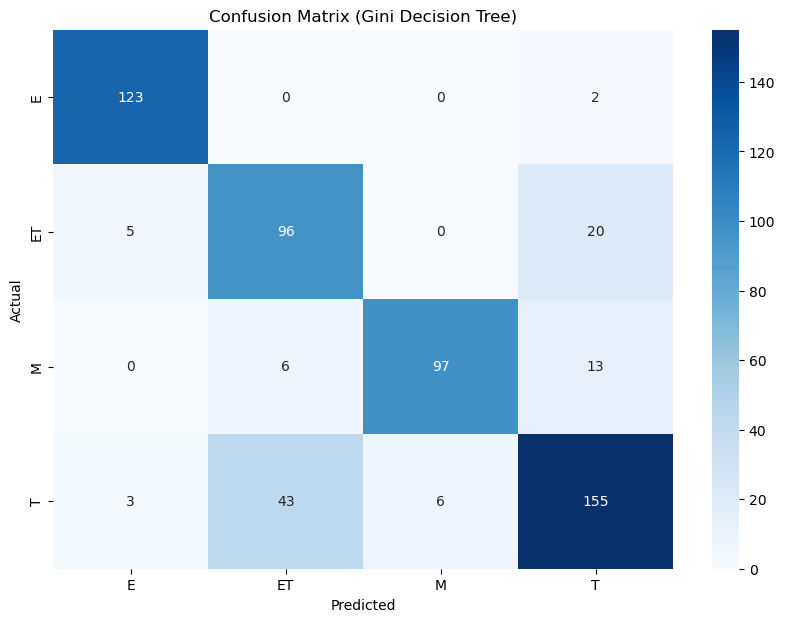

In [85]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_pred_gini),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Gini Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The diagonal having highest distribution indicates the accuracy of the model giving true positives. There are a few false positives as well, majority when the actual value is T and predicted is ET, this is because the classifiers for these could be very similar having only minor differences.

ROC curve for Gini Decision Tree

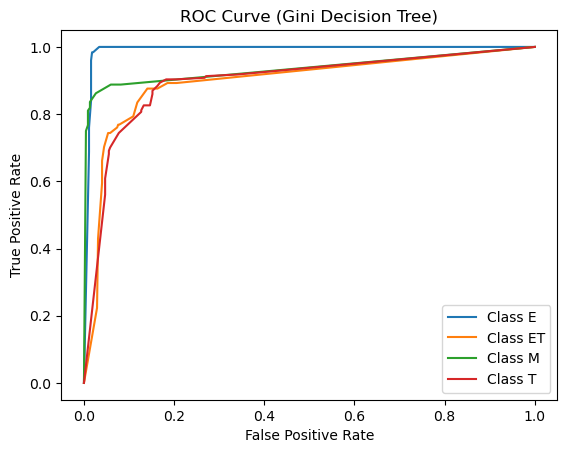

In [86]:
y_proba_gini = gini_tree.predict_proba(X_test)

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba_gini[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_name}")

plt.title("ROC Curve (Gini Decision Tree)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The area under the curve tells us the accuracy of the model. Class E being the highest and the rest being relatively close below it. This tells us that the accuracy of the model is pretty good for all the classification and only requires minor improvements if necessary.

Confusion matrix for Entropy decision tree

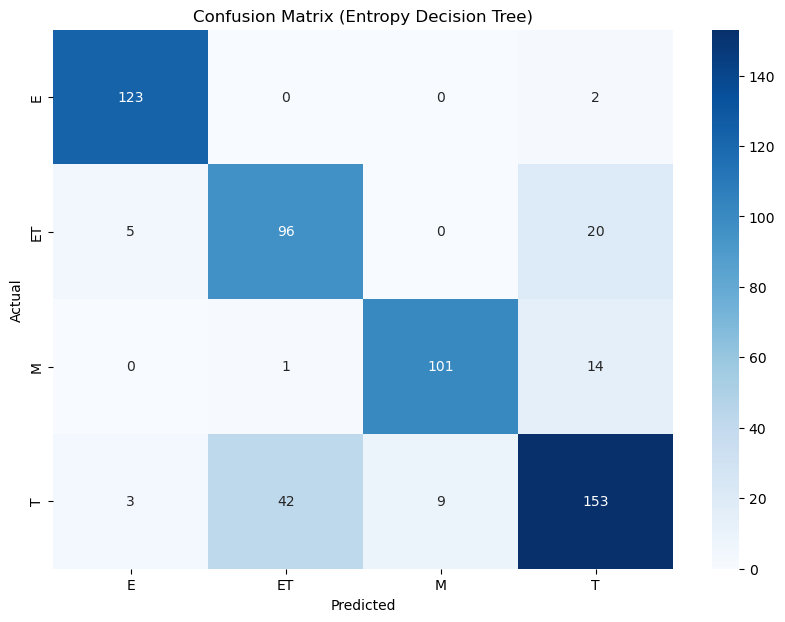

In [87]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_pred_entropy),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Entropy Decision Tree)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The diagonal having highest distribution indicates the accuracy of the model giving true positives. There are a few false positives as well, majority when the actual value is T and predicted is ET, this is because the classifiers for these could be very similar having only minor differences.

ROC curve for Entropy Decision Tree

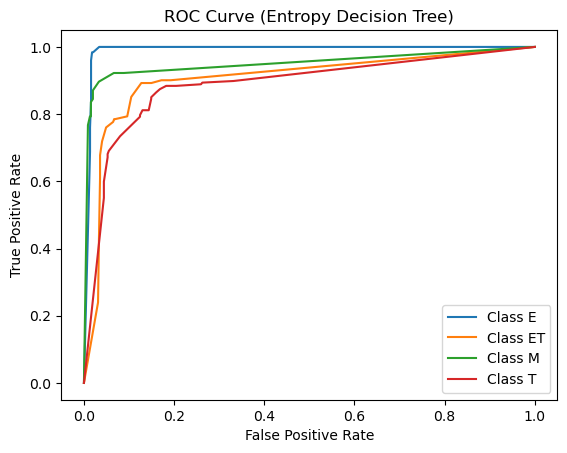

In [88]:
y_proba_entropy = entropy_tree.predict_proba(X_test)

for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_proba_entropy[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_name}")

plt.title("ROC Curve (Entropy Decision Tree)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

The area under the curve tells us the accuracy of the model. Class E being the highest and the rest being relatively close below it, though it is slightly varying from gini index. This tells us that the accuracy of the model is pretty good for all the classification and only requires minor improvements if necessary.

Vizualization of the Entropy Decision Tree

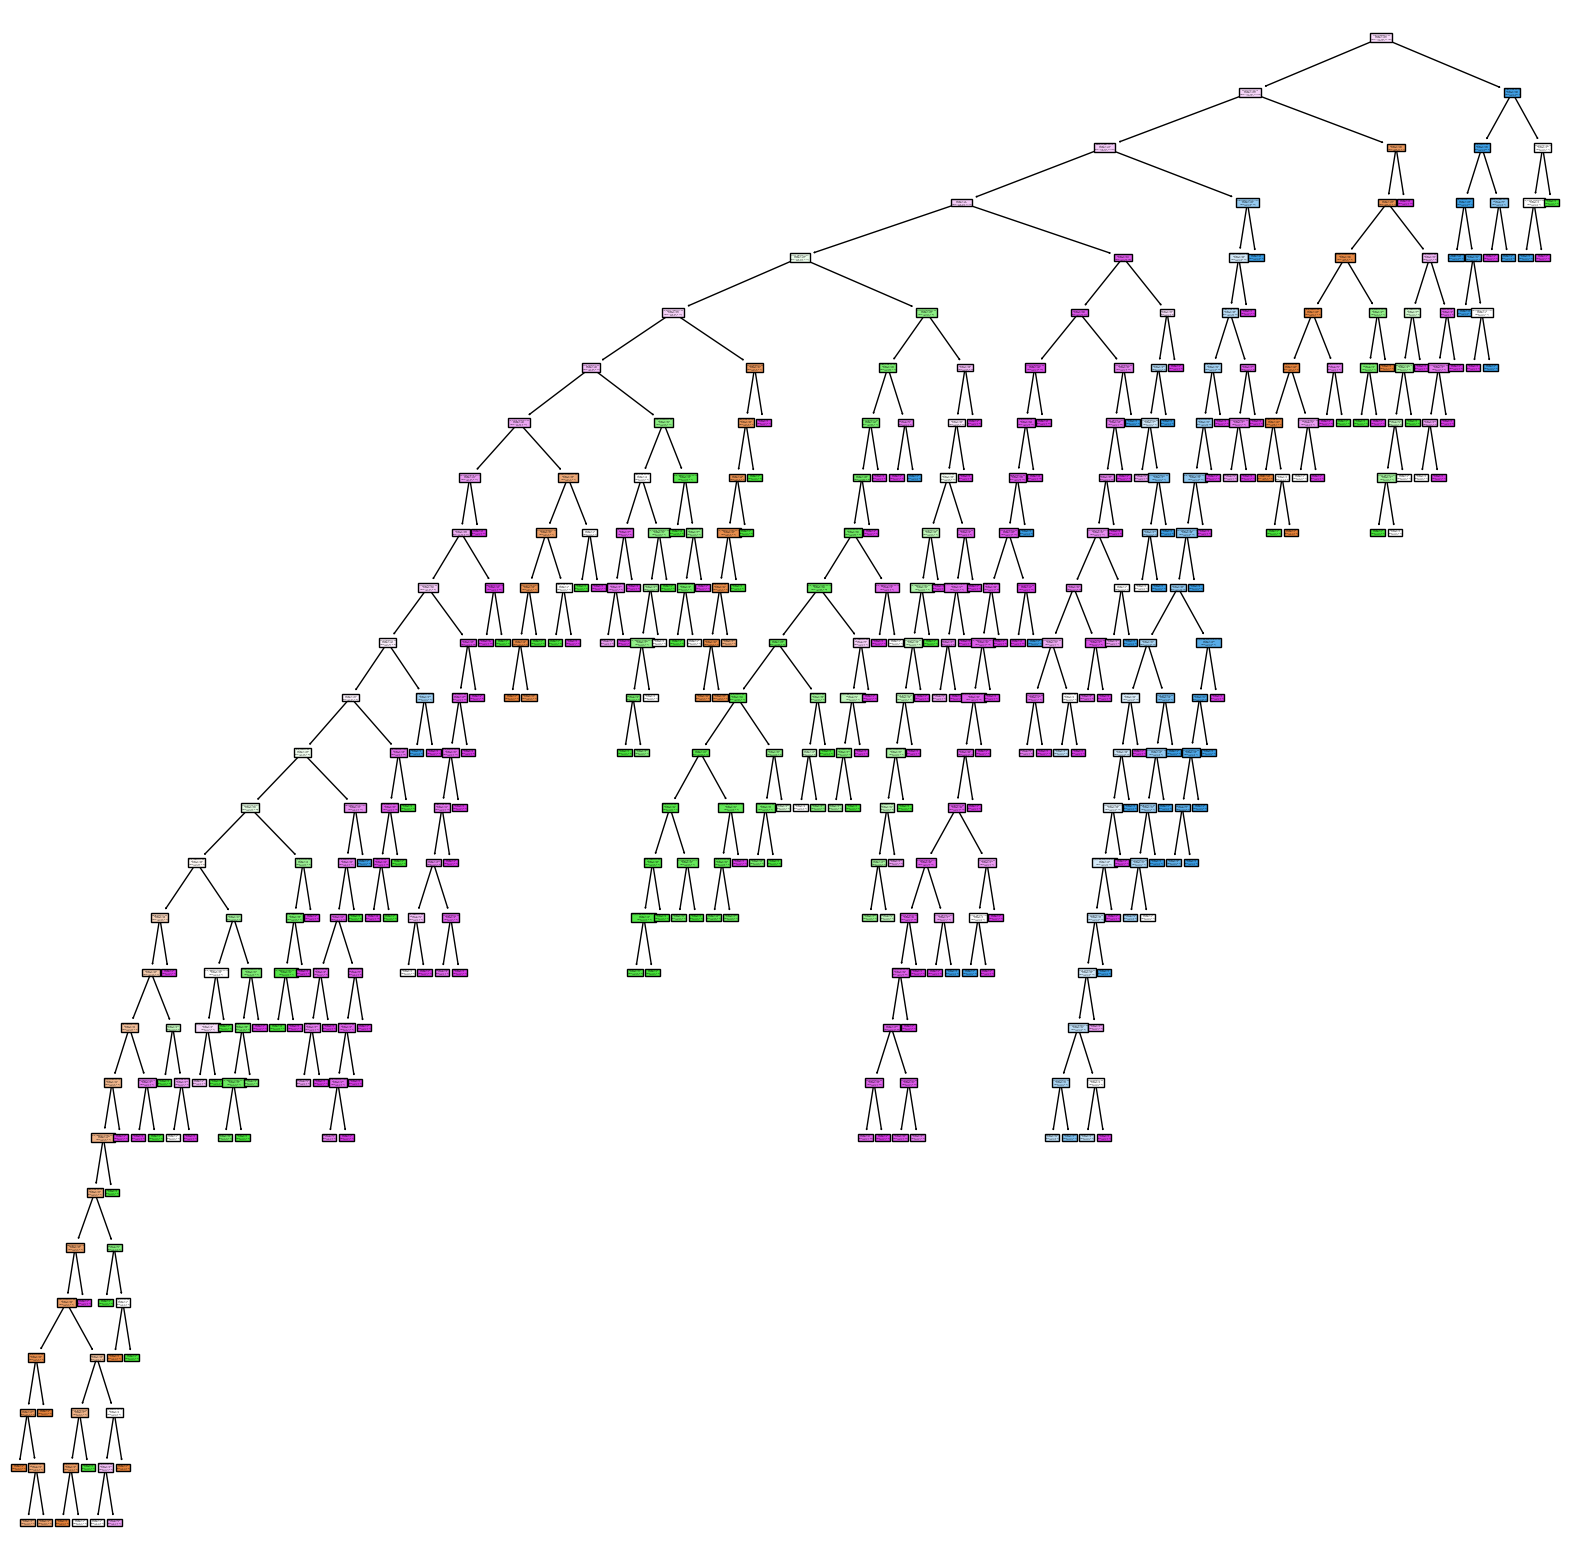

In [33]:
plt.figure(figsize=(20, 20))
features = list(X.columns)
classes = list(label_encoder.classes_)
tree.plot_tree(entropy_tree, feature_names=features, class_names=classes, filled=True)

plt.show()

Pre pruning techniques

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

gcv = GridSearchCV(estimator=gini_tree,param_grid=params)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.8665158371040724
Test score 0.7996485061511424


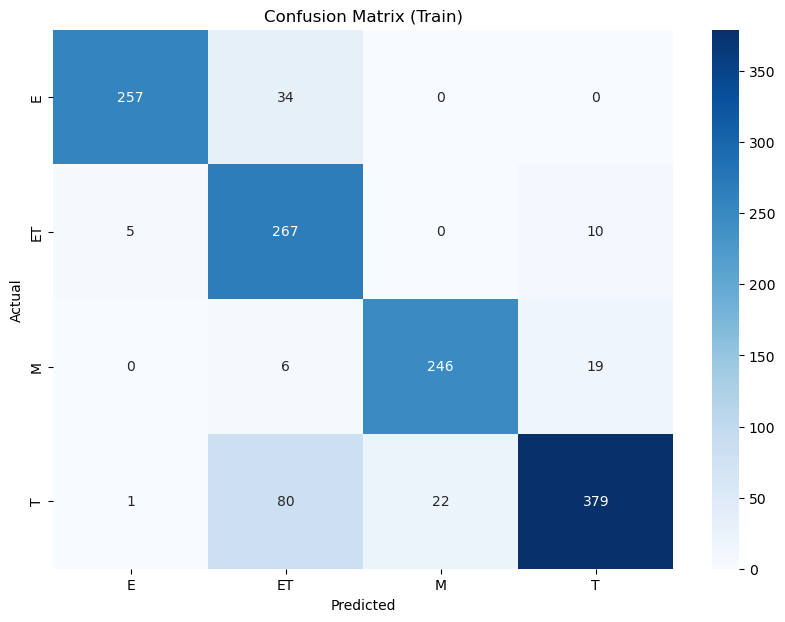

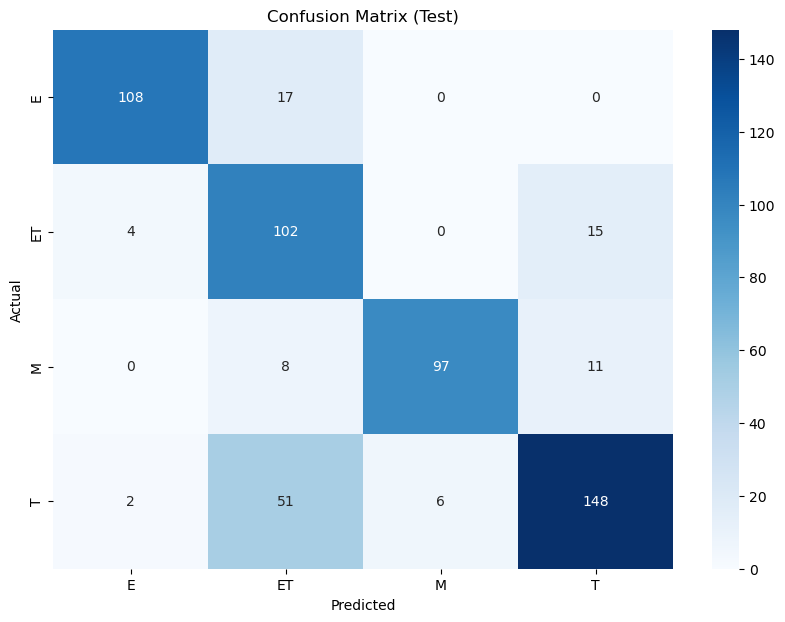

In [32]:
model = gcv.best_estimator_
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_train, y_train_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

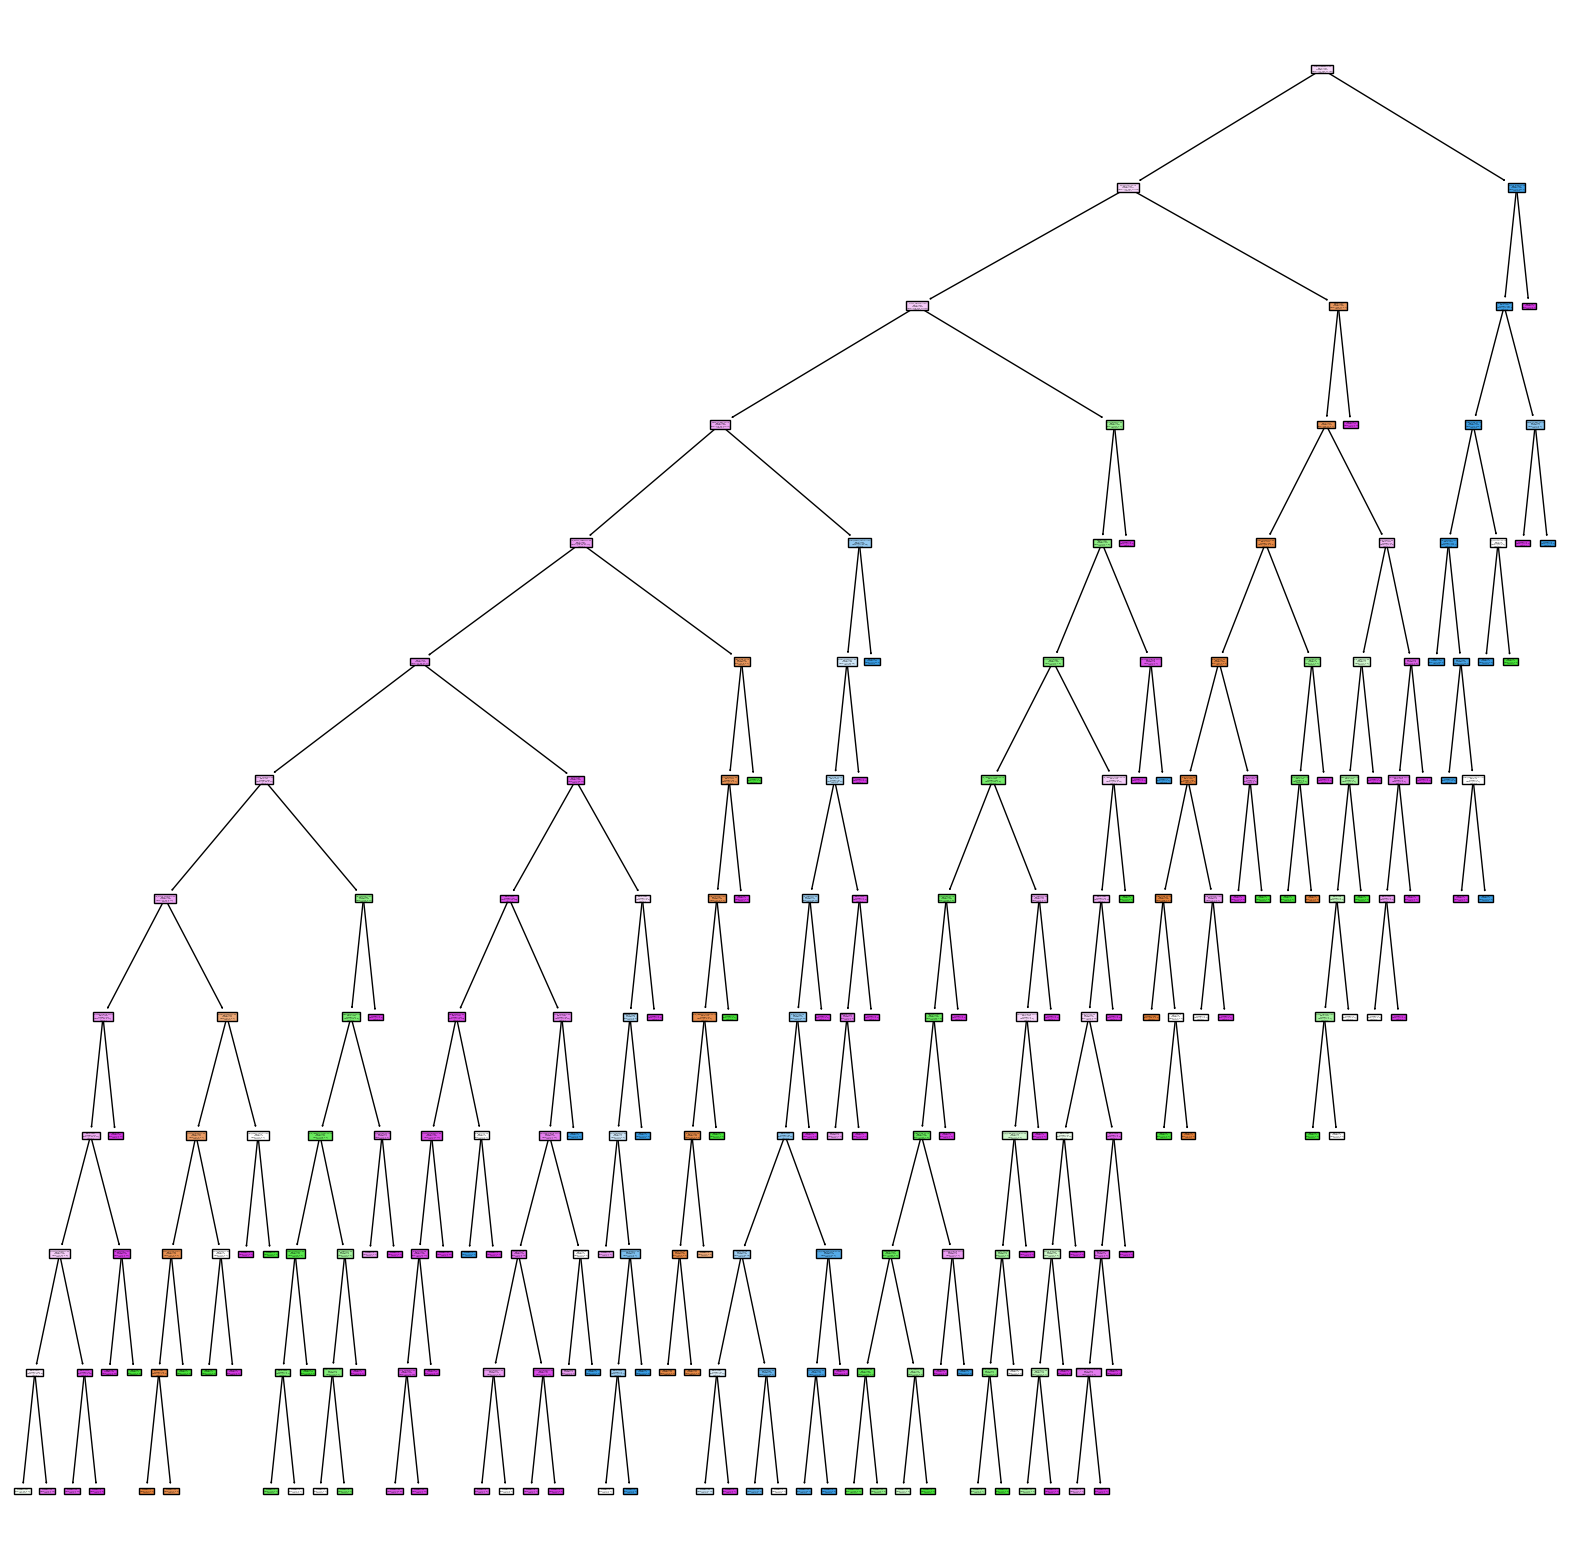

In [34]:
plt.figure(figsize=(20, 20))
features = list(X.columns)
classes = list(label_encoder.classes_)
tree.plot_tree(model, feature_names=features, class_names=classes, filled=True)

plt.show()

In [35]:
path = gini_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 4.87490506e-08 8.28733860e-07 8.37942014e-06
 2.15086720e-05 2.98601446e-05 3.23206206e-05 3.94325654e-05
 4.11353353e-05 5.02765209e-05 5.02765209e-05 5.25650680e-05
 5.31331414e-05 5.33235827e-05 5.71324101e-05 5.74588810e-05
 6.28456511e-05 6.38675316e-05 6.70353612e-05 7.54147813e-05
 7.54147813e-05 8.37942014e-05 8.61883215e-05 9.48443669e-05
 9.69618617e-05 1.00553042e-04 1.03123245e-04 1.19217019e-04
 1.25691302e-04 1.25691302e-04 1.25691302e-04 1.37117784e-04
 1.50829563e-04 1.61603103e-04 1.67588403e-04 1.68476719e-04
 1.88536953e-04 1.96535491e-04 2.01106083e-04 2.04020664e-04
 2.07183465e-04 2.34191278e-04 2.51382604e-04 2.51382604e-04
 2.51382604e-04 2.77663513e-04 2.83703225e-04 2.99265005e-04
 3.35938571e-04 3.45651081e-04 3.77073906e-04 4.02212167e-04
 4.18971007e-04 4.25871706e-04 4.52488688e-04 4.52488688e-04
 4.56212875e-04 4.81181854e-04 4.99321611e-04 5.02765209e-04
 5.27903469e-04 5.65027154e-04 5.65610860e-04 5.74588810e-04
 5.74588810e-04 5.770839

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

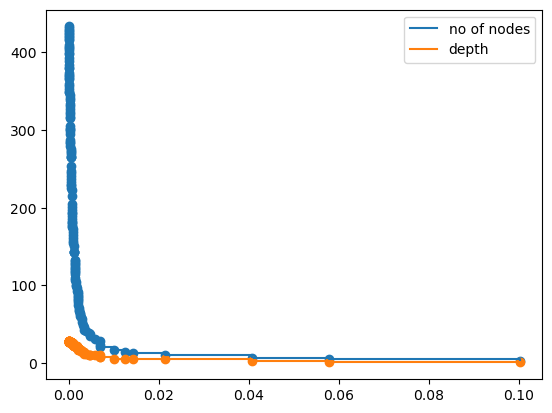

In [37]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

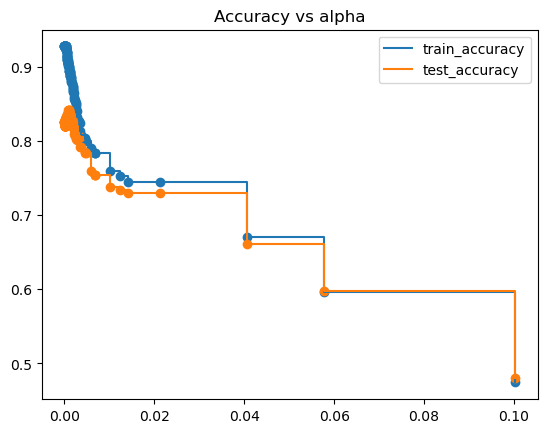

In [38]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.744343891402715
Test score 0.7293497363796133


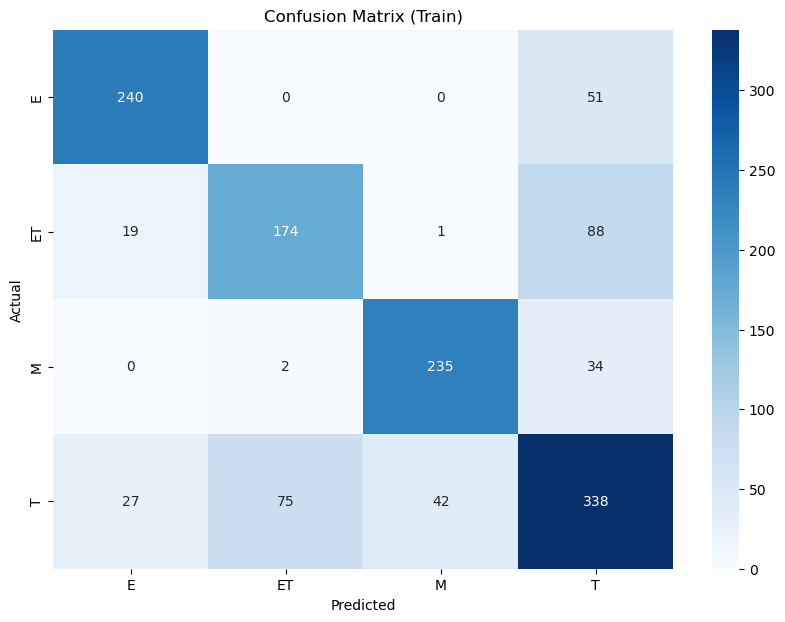

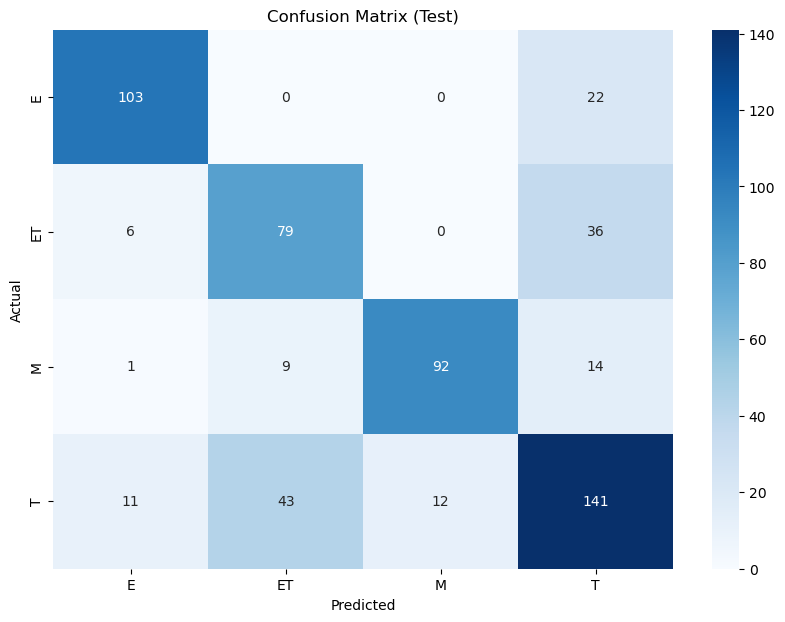

In [41]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_train, y_train_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_
)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

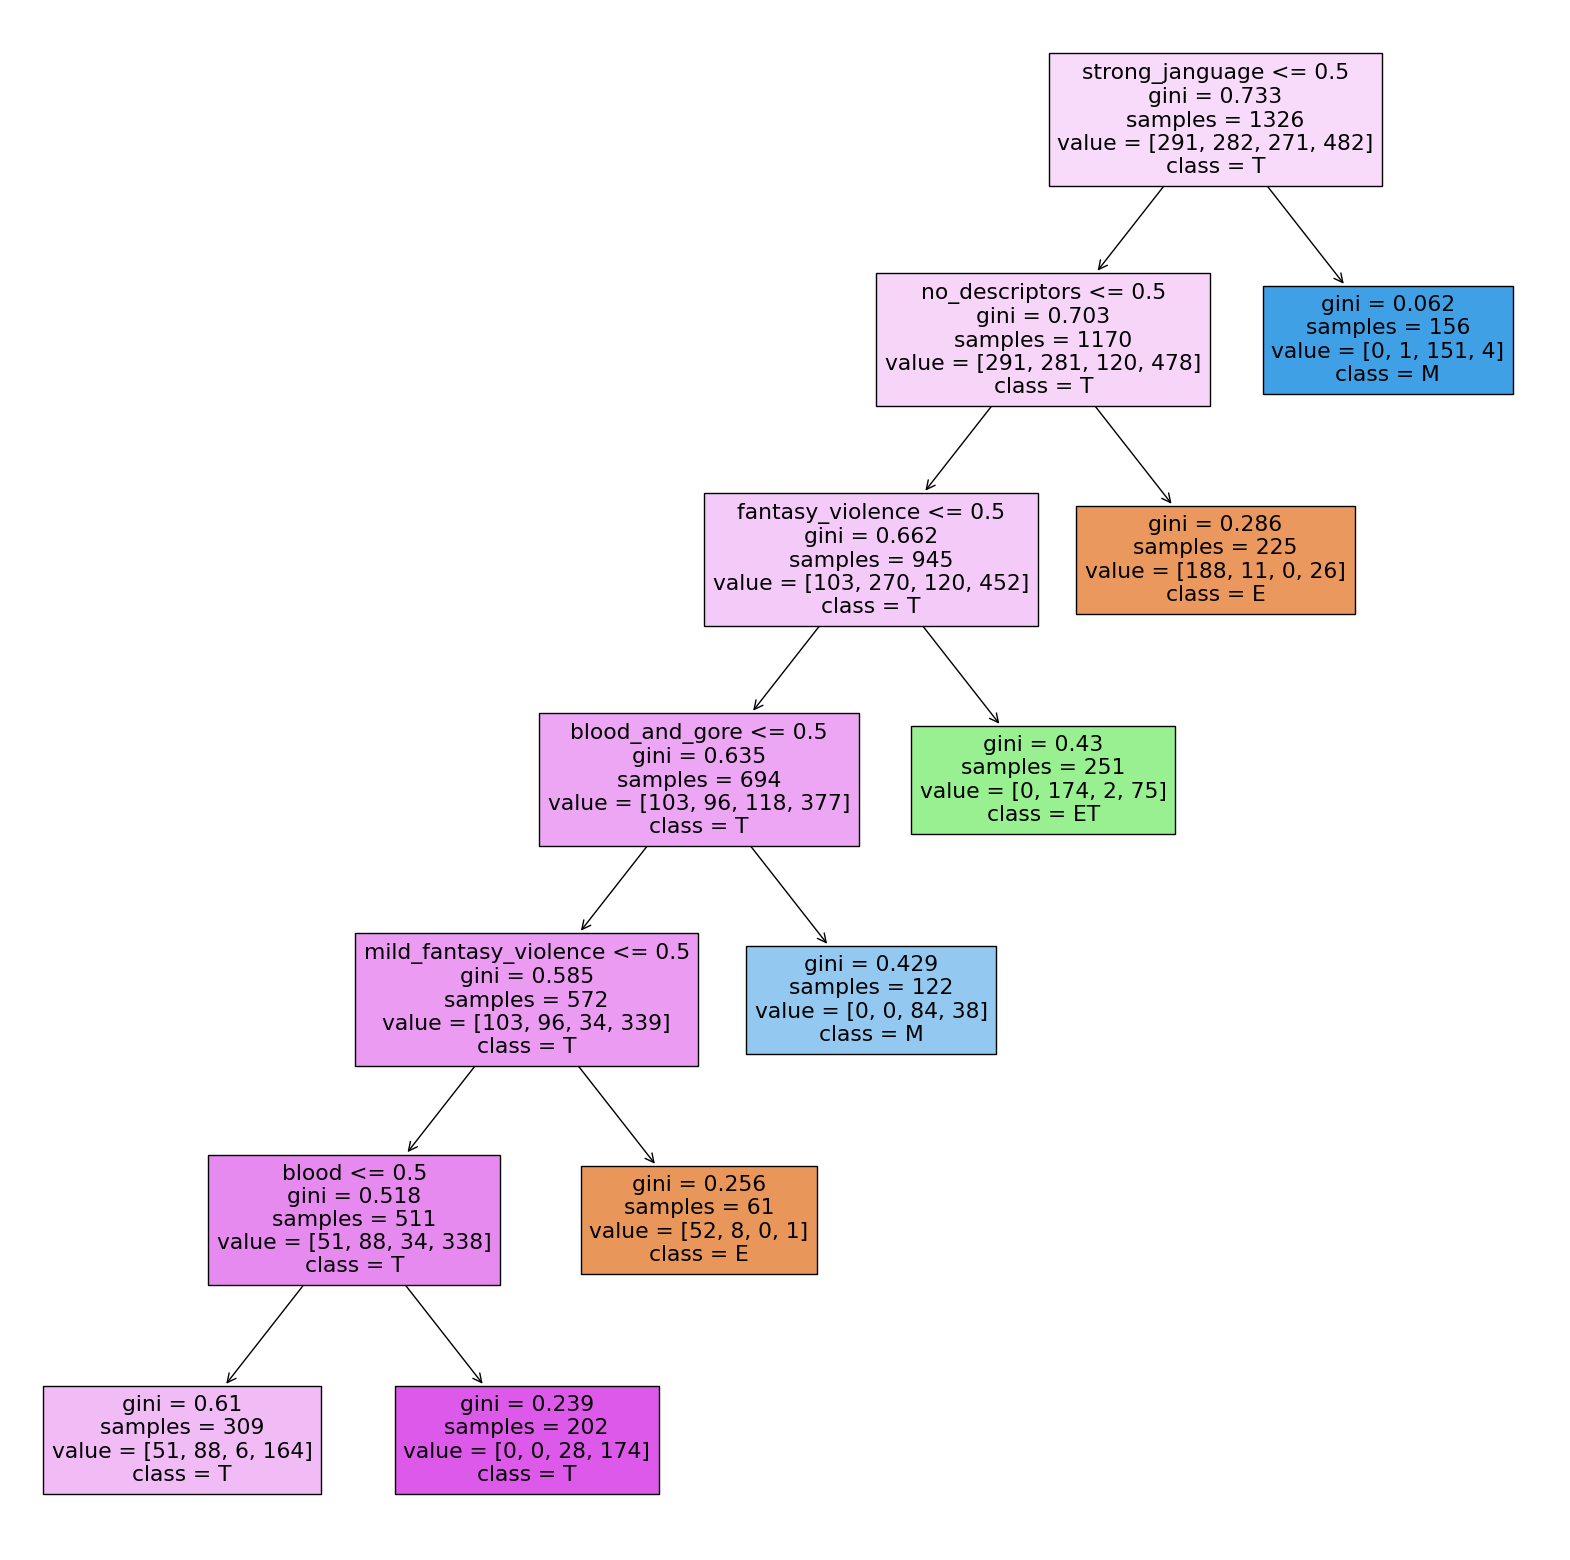

In [42]:
plt.figure(figsize=(20, 20))
features = list(X.columns)
classes = list(label_encoder.classes_)
tree.plot_tree(clf_, feature_names=features, class_names=classes, filled=True)
plt.show()